# Reto Clasificación flores
### Cargamos las librerías y las funciones a utilizar

In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import numpy as np

iris = load_iris() # Cargar la base de datos Iris

# Funciones de la practica

# Función para calcular especificidad
def calcular_especificidad(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    especificidades = []
    
    for i in range(len(iris.target_names)):
        tn = cm.sum() - (cm[i, :].sum() + cm[:, i].sum() - cm[i, i])
        fp = cm[:, i].sum() - cm[i, i]
        if (tn + fp) != 0:
            especificidad = tn / (tn + fp)
        else:
            especificidad = np.nan
        especificidades.append(especificidad)
    
    return np.nanmean(especificidades)

# Función para evaluar el modelo
def evaluar_modelo(nombre, y_test, y_pred, modelo, X_test):
    print(f'\nResultados para {nombre}:')
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    accuracy = accuracy_score(y_test, y_pred)
    especificidad = calcular_especificidad(y_test, y_pred)

    print(f'Precision: {precision}')
    print(f'Recall (Sensibilidad): {recall}')
    print(f'F1-score: {f1}')
    print(f'Accuracy: {accuracy}')
    print(f'Especificidad: {especificidad}')

    # Curva ROC y AUC
    y_prob = modelo.predict_proba(X_test)
    fpr = {}
    tpr = {}
    auc = {}

    for i in range(len(iris.target_names)):
        fpr[i], tpr[i], _ = roc_curve(y_test == i, y_prob[:, i])
        auc[i] = roc_auc_score(y_test == i, y_prob[:, i])
    
        plt.plot(fpr[i], tpr[i], label=f'Clase {iris.target_names[i]} (AUC = {auc[i]:.2f})')

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Tasa de Falsos Positivos')
    plt.ylabel('Tasa de Verdaderos Positivos')
    plt.title(f'Curva ROC - {nombre}')
    plt.legend(loc="lower right")
    plt.show()

# Graficar las matrices de confusión
def graficar_matriz_confusion(y_test, y_pred, modelo_nombre):
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=iris.target_names, yticklabels=iris.target_names)
    plt.title(f"Matriz de Confusión - {modelo_nombre}")
    plt.xlabel("Predicción")
    plt.ylabel("Real")
    plt.show()

### Cargarmos la base de datos Iris y la Graficamos

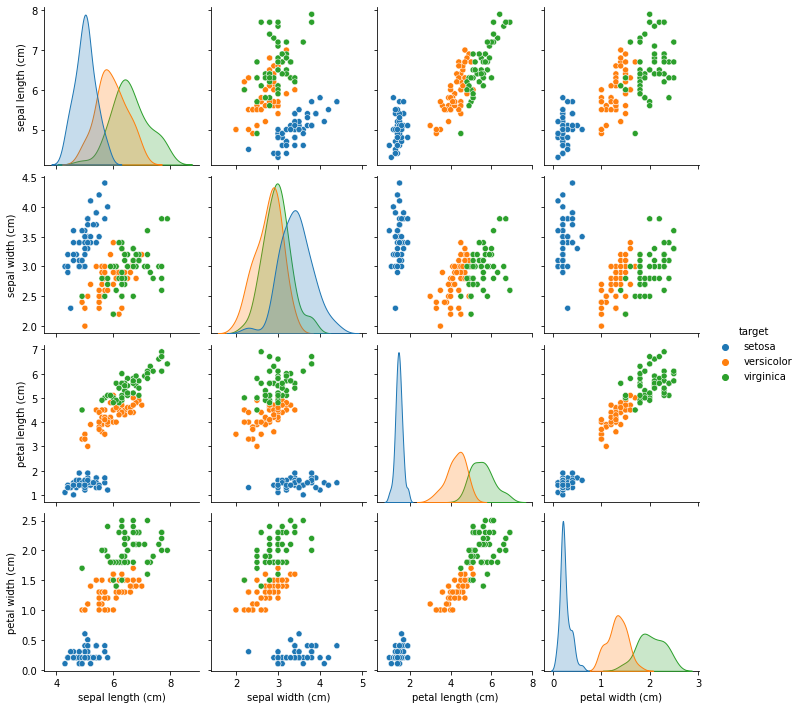

In [2]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target
df['target'] = df['target'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})
df.head()
sns.pairplot(df, hue='target')
plt.show()

### Separar datos en train y test

In [3]:
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1000)
#X_train contiene el largo y el ancho del petalo y del sepalo global
#y_train contiene el tipo de flor para los X_train en orden
#X_test contiene el largo y el ancho del petalo y del sepalo para probar selescionados aleatoriamente
#y_test contiene el tipo de flor para los X_test correspondientes
print(f'Mostramos los datos de Entrenamiento: X_train shape: {X_train.shape}, Y_train shape: {y_train.shape}')
print(f'Mostramos los datos de Testeo: X_test shape: {X_test.shape}, Y_test shape: {y_test.shape}')

print("\n\nValores de Entrenamiento y Target:")
for x1, y1 in zip(X_train, y_train):
    print(f'{x1} -> {iris.target_names[y1]}')
    

Mostramos los datos de Entrenamiento: X_train shape: (105, 4), Y_train shape: (105,)
Mostramos los datos de Testeo: X_test shape: (45, 4), Y_test shape: (45,)


Valores de Entrenamiento y Target:
[4.9 2.5 4.5 1.7] -> virginica
[5.8 2.7 5.1 1.9] -> virginica
[6.8 3.  5.5 2.1] -> virginica
[6.8 2.8 4.8 1.4] -> versicolor
[4.6 3.1 1.5 0.2] -> setosa
[5.5 4.2 1.4 0.2] -> setosa
[4.4 2.9 1.4 0.2] -> setosa
[5.1 2.5 3.  1.1] -> versicolor
[7.7 2.8 6.7 2. ] -> virginica
[6.  3.  4.8 1.8] -> virginica
[6.  2.7 5.1 1.6] -> versicolor
[7.9 3.8 6.4 2. ] -> virginica
[6.5 3.  5.2 2. ] -> virginica
[5.  2.3 3.3 1. ] -> versicolor
[6.  2.9 4.5 1.5] -> versicolor
[5.7 2.9 4.2 1.3] -> versicolor
[4.6 3.6 1.  0.2] -> setosa
[6.3 2.9 5.6 1.8] -> virginica
[5.7 2.8 4.1 1.3] -> versicolor
[6.7 3.3 5.7 2.1] -> virginica
[6.7 3.1 5.6 2.4] -> virginica
[5.5 2.4 3.8 1.1] -> versicolor
[6.7 3.1 4.7 1.5] -> versicolor
[4.9 3.1 1.5 0.1] -> setosa
[6.3 3.4 5.6 2.4] -> virginica
[5.1 3.8 1.5 0.3] -> setosa
[6.1 2.

# 1. Árbol de Decisión


Resultados para Árbol de Decisión:
Precision: 0.9426900584795321
Recall (Sensibilidad): 0.9398148148148149
F1-score: 0.9407149084568439
Accuracy: 0.9333333333333333
Especificidad: 0.9638143891017456


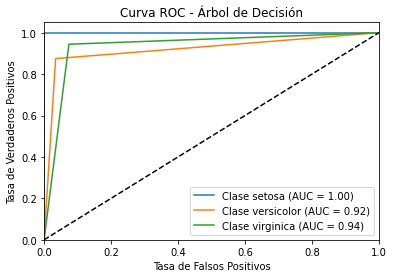

In [4]:
tree = DecisionTreeClassifier(max_depth=8, min_samples_split=10, criterion='gini')
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)
evaluar_modelo("Árbol de Decisión", y_test, y_pred_tree, tree, X_test)

# 2. Regresión Logística


Resultados para Regresión Logística:
Precision: 0.9411764705882352
Recall (Sensibilidad): 0.9421296296296297
F1-score: 0.9411255411255411
Accuracy: 0.9333333333333333
Especificidad: 0.9646658152405277


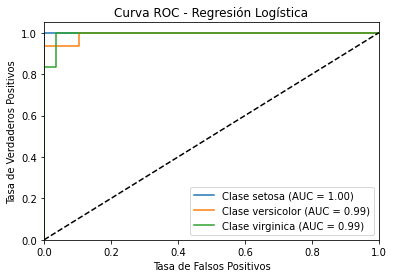

In [5]:
logreg = LogisticRegression(max_iter=10000, solver='lbfgs', C=1, penalty='l2', random_state=42)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)
evaluar_modelo("Regresión Logística", y_test, y_pred_logreg, logreg, X_test)

# 3. Bosques Aleatorios


Resultados para Bosques Aleatorios:
Precision: 0.9606481481481483
Recall (Sensibilidad): 0.9606481481481483
F1-score: 0.9606481481481483
Accuracy: 0.9555555555555556
Especificidad: 0.9761600681140911


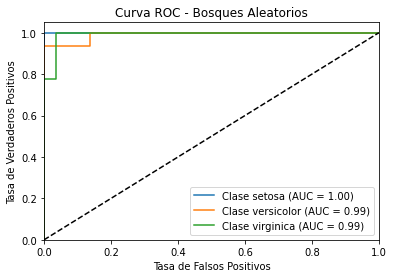

In [6]:
forest = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=5, 
                                min_samples_leaf=2, random_state=42, criterion='gini')
forest.fit(X_train, y_train)
y_pred_forest = forest.predict(X_test)
evaluar_modelo("Bosques Aleatorios", y_test, y_pred_forest, forest, X_test)

# Graficamos las matrices de confusión de cada modelo

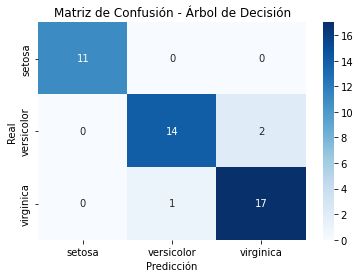

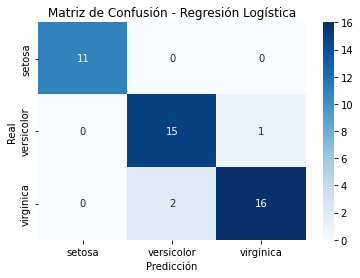

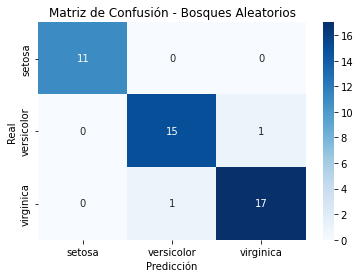

In [7]:
graficar_matriz_confusion(y_test, y_pred_tree, "Árbol de Decisión")
graficar_matriz_confusion(y_test, y_pred_logreg, "Regresión Logística")
graficar_matriz_confusion(y_test, y_pred_forest, "Bosques Aleatorios")

## Separación de Datos: Función `train_test_split()`

Para esta práctica se utiliza la función `train_test_split` de la librería `sklearn.model_selection`. Esta función se encarga de dividir el conjunto de datos en dos partes: entrenamiento (**train**) y prueba (**test**). Aunque en este caso se ha utilizado para una partición de 70% entrenamiento y 30% prueba, puede ser adaptada para incluir también un conjunto de validación. 

#### Ventajas de `train_test_split`:

1. **Facilita la evaluación del modelo**: Al separar los datos en diferentes conjuntos, podemos entrenar el modelo en el conjunto de entrenamiento y evaluarlo en el conjunto de prueba para medir su rendimiento.
2. **Generalización**: Ayuda a evaluar la capacidad de generalización del modelo en datos no vistos (el conjunto de prueba).
3. **Flexible**: Podemos ajustar el porcentaje de datos que queremos utilizar para entrenamiento, prueba e incluso validación.

### Uso en esta práctica

En este caso, hemos dividido los datos del conjunto **Iris** en 70% para entrenamiento y 30% para prueba:

```python
from sklearn.model_selection import train_test_split

# División de los datos en entrenamiento y prueba (70%-30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1000)


# Explicación de métricas de evaluación de modelos

Este documento explica las métricas de evaluación utilizadas en varios modelos de clasificación aplicados al conjunto de datos **Iris**. Los modelos incluyen un **Árbol de Decisión**, una **Regresión Logística** y un **Bosque Aleatorio**. A continuación, se describen las métricas: precisión, recall (sensibilidad), F1-score, exactitud (accuracy), especificidad, y AUC-ROC, con su respectiva explicación matemática y cómo se implementan en el código.

---

## 1. Precisión (Precision)

La **precisión** mide la proporción de verdaderos positivos (TP) sobre el total de instancias clasificadas como positivas (TP + FP). Es útil cuando el costo de los falsos positivos es alto.

**Fórmula:**

$$
Precision = \frac{TP}{TP + FP}
$$

**En el código:** Se utiliza la función `precision_score()` de `sklearn.metrics`.

---

## 2. Recall (Sensibilidad)

El **recall** o **sensibilidad** mide la proporción de verdaderos positivos (TP) sobre el total de instancias que son realmente positivas (TP + FN). Es útil cuando el costo de los falsos negativos es alto.

**Fórmula:**

$$
Recall = \frac{TP}{TP + FN}
$$

**En el código:** Se utiliza la función `recall_score()` de `sklearn.metrics`.

---

## 3. F1-Score

El **F1-score** es la media armónica entre precisión y recall. Se utiliza cuando se quiere un balance entre estas dos métricas, especialmente en casos de datos desbalanceados.

**Fórmula:**

$$
F1 = 2 \cdot \frac{Precision \cdot Recall}{Precision + Recall}
$$

**En el código:** Se calcula con la función `f1_score()` de `sklearn.metrics`.

---

## 4. Exactitud (Accuracy)

La **exactitud** mide la proporción de predicciones correctas (verdaderos positivos y verdaderos negativos) sobre el total de predicciones.

**Fórmula:**

$$
Accuracy = \frac{TP + TN}{TP + TN + FP + FN}
$$

**En el código:** Se implementa utilizando la función `accuracy_score()` de `sklearn.metrics`.

---

## 5. Especificidad

La **especificidad** mide la proporción de verdaderos negativos (TN) sobre el total de instancias que son realmente negativas (TN + FP). Es útil para evaluar cómo el modelo evita clasificar incorrectamente instancias negativas como positivas.

**Fórmula:**

$$
Specificity = \frac{TN}{TN + FP}
$$

**En el código:** Se implementa manualmente con la función `calcular_especificidad()`, que utiliza la matriz de confusión (`confusion_matrix()`).

---

## 6. Curva ROC y AUC

La **curva ROC** muestra la relación entre la tasa de verdaderos positivos (TPR) y la tasa de falsos positivos (FPR) a diferentes umbrales de clasificación.

El **AUC** (Área Bajo la Curva) mide el área bajo la curva ROC. Un AUC cercano a 1 indica un buen desempeño del modelo para distinguir entre clases.

**En el código:** Se utiliza `roc_curve()` y `roc_auc_score()` para calcular y graficar la curva ROC para cada clase.

---

## 7. Matriz de Confusión

La **matriz de confusión** muestra el número de verdaderos positivos (TP), verdaderos negativos (TN), falsos positivos (FP) y falsos negativos (FN) para cada clase, permitiendo visualizar los errores de clasificación.

**En el código:** La matriz de confusión se grafica utilizando `confusion_matrix()` y la función `graficar_matriz_confusion()`, que genera un heatmap de la matriz.

---

## Resumen de las Funciones Utilizadas:

- **`precision_score()`**: Calcula la precisión (macro promedio).
- **`recall_score()`**: Calcula el recall o sensibilidad (macro promedio).
- **`f1_score()`**: Calcula el F1-score (macro promedio).
- **`accuracy_score()`**: Calcula la exactitud de las predicciones.
- **`calcular_especificidad()`**: Calcula la especificidad para cada clase y retorna el promedio.
- **`roc_curve()`** y **`roc_auc_score()`**: Calculan la curva ROC y el área bajo la curva.
- **`confusion_matrix()`**: Genera la matriz de confusión.
- **`graficar_matriz_confusion()`**: Grafica la matriz de confusión usando Seaborn.

## Modelos Evaluados:

Los modelos evaluados incluyen:

1. **Árbol de Decisión** (`DecisionTreeClassifier`).
2. **Regresión Logística** (`LogisticRegression`).
3. **Bosque Aleatorio** (`RandomForestClassifier`).

Cada modelo es entrenado con el conjunto de datos Iris y evaluado usando las métricas mencionadas. Las matrices de confusión y las curvas ROC de cada modelo se grafican para una mejor visualización del rendimiento.

---


### 1. Árbol de Decisión

Un **Árbol de Decisión** es un modelo de clasificación que divide el espacio de características en regiones homogéneas basadas en las características de entrada. El árbol se construye seleccionando los atributos que mejor separan las clases en cada nodo.

- **Entrenamiento**: Se utilizó la función `DecisionTreeClassifier(max_depth=8)` para entrenar el modelo con una profundidad máxima de 8.
- **Predicción**: Las predicciones en el conjunto de prueba se generaron con `tree.predict()`.
- **Evaluación**: Se calcularon todas las métricas (precisión, recall, F1-score, exactitud, especificidad, AUC) usando la función `evaluar_modelo()`.

```python
tree = DecisionTreeClassifier(max_depth=8)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)
evaluar_modelo("Árbol de Decisión", y_test, y_pred_tree, tree, X_test)


### 2. Regresión Logística

La **Regresión Logística** es un modelo de clasificación lineal que estima las probabilidades de cada clase utilizando una función logística o sigmoide. Este tipo de modelo es ampliamente utilizado para problemas de clasificación binaria, aunque también puede extenderse para casos multiclase.

### Entrenamiento del Modelo

Utilizamos el conjunto de datos **Iris** para entrenar el modelo de Regresión Logística. La función `LogisticRegression()` de `sklearn.linear_model` se encarga de ajustar el modelo a los datos de entrenamiento.

```python
from sklearn.linear_model import LogisticRegression

# Entrenamiento del modelo de Regresión Logística
logreg = LogisticRegression(max_iter=10000)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)


### 3. Bosques Aleatorios

Un **Bosque Aleatorio** es un conjunto de árboles de decisión que se utilizan como un modelo de clasificación. Este enfoque mejora la robustez y generalización del modelo, ya que cada árbol se entrena en un subconjunto aleatorio de los datos y las características, reduciendo así la varianza y evitando el sobreajuste.

## Entrenamiento del Modelo

Entrenamos un Bosque Aleatorio utilizando la clase `RandomForestClassifier` de la librería `sklearn.ensemble`. En este caso, utilizamos 100 árboles en el bosque para mejorar la precisión del modelo.

```python
from sklearn.ensemble import RandomForestClassifier

# Entrenamiento del modelo de Bosques Aleatorios
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)
y_pred_forest = forest.predict(X_test)


# Análisis Comparativo de Modelos de Clasificación

En esta sección, se presenta una comparación entre tres modelos de clasificación: **Árbol de Decisión**, **Regresión Logística** y **Bosques Aleatorios**. Los modelos se evaluaron utilizando las siguientes métricas: **Precisión**, **Recall (Sensibilidad)**, **F1-score**, **Accuracy** y **Especificidad**.

## Resultados de los Modelos

### 1. Árbol de Decisión

- **Precisión**: 0.943
- **Recall (Sensibilidad)**: 0.940
- **F1-score**: 0.941
- **Accuracy**: 0.933
- **Especificidad**: 0.964

### 2. Regresión Logística

- **Precisión**: 0.941
- **Recall (Sensibilidad)**: 0.942
- **F1-score**: 0.941
- **Accuracy**: 0.933
- **Especificidad**: 0.965

### 3. Bosques Aleatorios

- **Precisión**: 0.961
- **Recall (Sensibilidad)**: 0.961
- **F1-score**: 0.961
- **Accuracy**: 0.956
- **Especificidad**: 0.976

## Comparación de Resultados

### Precisión
- **Bosques Aleatorios**: 0.961
- **Árbol de Decisión**: 0.943
- **Regresión Logística**: 0.941

**Bosques Aleatorios** tiene la mayor precisión, indicando que es el modelo más preciso en la clasificación de las instancias.

### Recall (Sensibilidad)
- **Bosques Aleatorios**: 0.961
- **Regresión Logística**: 0.942
- **Árbol de Decisión**: 0.940

**Bosques Aleatorios** también tiene el mayor recall, mostrando que identifica un mayor porcentaje de casos positivos.

### F1-score
- **Bosques Aleatorios**: 0.961
- **Árbol de Decisión**: 0.941
- **Regresión Logística**: 0.941

El **Bosques Aleatorios** logra el mejor F1-score, indicando un balance óptimo entre precisión y recall.

### Accuracy
- **Bosques Aleatorios**: 0.956
- **Árbol de Decisión**: 0.933
- **Regresión Logística**: 0.933

**Bosques Aleatorios** presenta la mayor exactitud general, lo que significa que es el modelo más consistente en clasificar correctamente las instancias.

### Especificidad
- **Bosques Aleatorios**: 0.976
- **Regresión Logística**: 0.965
- **Árbol de Decisión**: 0.964

**Bosques Aleatorios** tiene la mejor especificidad, lo que indica que es el mejor en identificar correctamente las instancias negativas.

## Conclusión

En base a las métricas evaluadas, el **Bosques Aleatorios** se destaca como el mejor modelo entre los tres en esta práctica. Ofrece la mayor precisión, recall, F1-score, exactitud y especificidad. Esto sugiere que el modelo de Bosques Aleatorios no solo es el más preciso, sino que también maneja de manera efectiva tanto los positivos como los negativos en la clasificación, proporcionando una clasificación robusta y generalizable.

El **Árbol de Decisión** y la **Regresión Logística** tienen desempeños similares, aunque ligeramente inferiores en comparación con los Bosques Aleatorios, particularmente en términos de precisión y recall. Ambos modelos pueden ser útiles, pero el Bosque Aleatorio ofrece una ventaja significativa en términos de rendimiento global.
